In [2]:
import micromagneticmodel as mm
import discretisedfield as df
import oommfc as oc
import numpy as np

In [16]:
W_core = 300e-9 
L_sim = 2000e-9
W_sim = 1000e-9
thickness = 50e-9

In [17]:
Ms_val = 1.4e5       # Saturation Magnetization (A/m)
A_val = 3.5e-12      # Exchange (J/m)
K_val = 4160         # Anisotropy (J/m^3) derived to match w ~ 30nm
D_val = 0.21e-3      # DMI (J/m^2)  derived to match Snell law ratio D/A
alpha_val = 1e-4     # Low damping for fiber

In [18]:
cell = (4e-9, 4e-9, thickness)
p1 = (-L_sim/2, -W_sim/2, 0)
p2 = (L_sim/2, W_sim/2, thickness)
region = df.Region(p1=p1, p2=p2)
mesh = df.Mesh(region=region, cell=cell)

In [19]:
def fiber_initial(pos):
    x,y,z = pos
    if -W_core/2 <= y <= W_core/2:
        return (0, 1, 0)
    return (0, -1, 0)

In [20]:
system = mm.System(name='spin_wave_fiber')

In [21]:
system.energy = mm.Exchange(A=A_val) + mm.DMI(D=D_val, crystalclass="T") + mm.UniaxialAnisotropy(K=K_val, u=(0,1,0)) + mm.Zeeman(H=(0,0,0))

In [22]:
system.dynamics = mm.Precession(gamma0=mm.consts.gamma0) + mm.Damping(alpha=alpha_val)

In [23]:
system.m = df.Field(mesh, nvdim=3, value=fiber_initial, norm=Ms_val)

In [24]:
md = oc.MinDriver()
md.drive(system)

Running OOMMF (DockerOOMMFRunner)[2026-02-01T10:26:47]... (8814.4 s)


AttributeError: Object has no attribute plane.

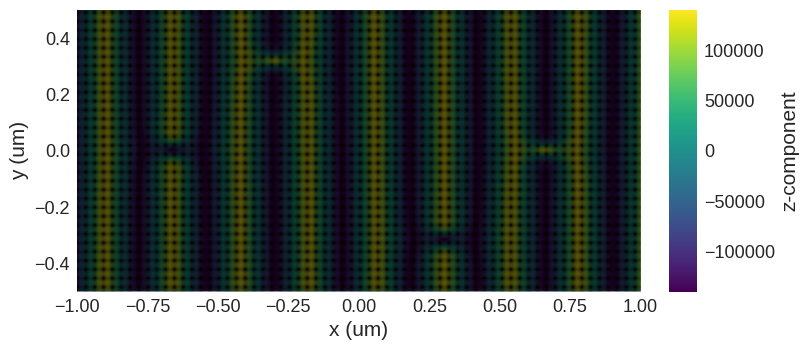

In [29]:
system.m.sel("z").mpl()

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import discretisedfield as df

In [11]:
vtkfilename = "../mumax-bashs/fiber/fiber_spin.out/m_z000000.ovf"
read_field = df.Field.from_file(vtkfilename)

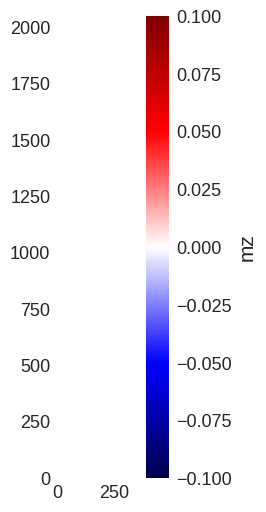

In [12]:
mz = read_field.sel("z").array.squeeze()
plt.imshow(mz, cmap="seismic", origin="lower")
plt.colorbar(label="mz")
plt.show()